In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('../data/telco_customer_churn.csv')

# Drop any columns with missing values (if any)
data = data.dropna()

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'customerID':  # Exclude customerID from encoding
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

# Separate features and target variable
X = data.drop(columns=['customerID', 'Churn'])
y = data['Churn']

# Standardize numerical features
scaler = StandardScaler()
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X[X.select_dtypes(include=['float64', 'int64']).columns])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic Regression with Polynomial Features:
Best Model Accuracy: 0.8176011355571328
Best Model Confusion Matrix:
 [[940  96]
 [161 212]]
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.57      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



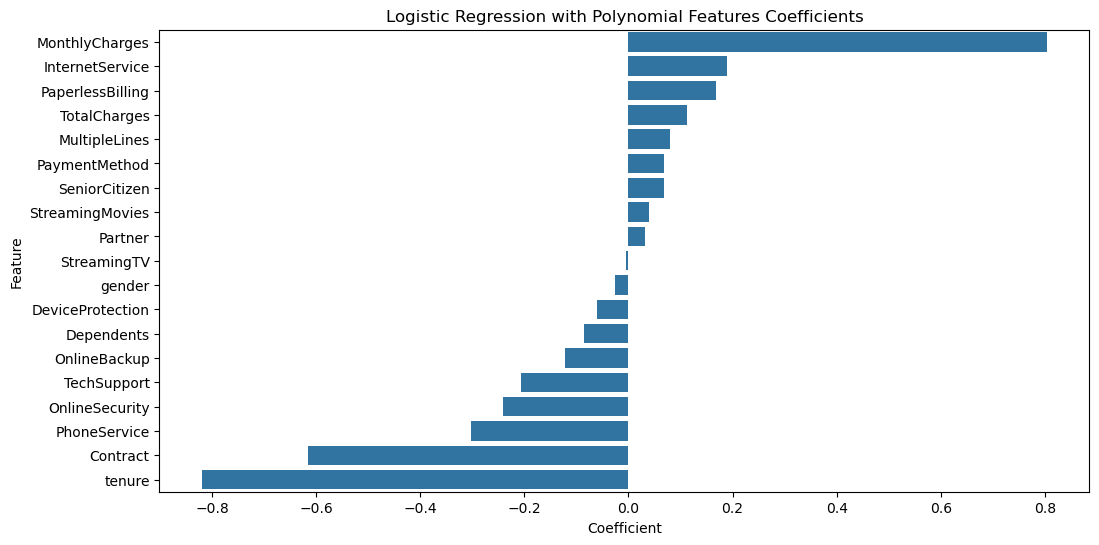

In [2]:
# Define a pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'))
])

# Define the parameter grid
param_grid = {
    'poly__degree': [1, 2, 3],
    'log_reg__C': [0.01, 0.1, 1, 10, 100]  # Regularization strength for Logistic Regression
}

# Initialize Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Best estimator
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print('Logistic Regression with Polynomial Features:')
print('Best Model Accuracy:', accuracy)
print('Best Model Confusion Matrix:\n', conf_matrix)
print('Best Model Classification Report:\n', class_report)

# Coefficients for Logistic Regression with polynomial features
coefficients = best_model.named_steps['log_reg'].coef_[0]
features_log_reg_poly = pd.DataFrame({'Feature': best_model.named_steps['poly'].get_feature_names_out(X.columns), 'Coefficient': coefficients})
features_log_reg_poly = features_log_reg_poly.sort_values(by='Coefficient', ascending=False)

# Plotting the top 20 feature coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=features_log_reg_poly.head(20))  # Display top 20 features
plt.title('Logistic Regression with Polynomial Features Coefficients')
plt.show()

In [3]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit Grid Search
grid_search_dt.fit(X_train, y_train)

# Best parameters
best_params_dt = grid_search_dt.best_params_

# Best estimator
best_model_dt = grid_search_dt.best_estimator_

# Make predictions with the best model
y_pred_best_dt = best_model_dt.predict(X_test)

# Evaluate the best model
accuracy_dt = accuracy_score(y_test, y_pred_best_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_best_dt)
class_report_dt = classification_report(y_test, y_pred_best_dt)

print('Decision Tree Classifier:')
print('Best Model Accuracy:', accuracy_dt)
print('Best Model Confusion Matrix:\n', conf_matrix_dt)
print('Best Model Classification Report:\n', class_report_dt)

Decision Tree Classifier:
Best Model Accuracy: 0.7643718949609652
Best Model Confusion Matrix:
 [[882 154]
 [178 195]]
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1036
           1       0.56      0.52      0.54       373

    accuracy                           0.76      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409

